## Library Import

In [1]:
import seaborn #pour la visualisation des donnees
import matplotlib #pour la visualisation
import numpy    #pour les calculs scientifiques (calcul matriciel)
import pandas  #pour les analyses de données , visualisation, manipulation
import scipy   # pour faire des probabilités (statistique decisionnelle)
import sklearn  # pour faire du machine learning



import spacy #NLP
import gensim #NLP
#import pytube #lire des videos
import tensorflow  #deep learning
import keras #deep learning

## data access

In [2]:
data=pandas.read_csv(r"C:\Users\sambe\Desktop\AIVANCITY\BACHELOR2\MACHINE LEARNING\Modele_Classification/HeartDiseaseUCI.csv")

In [3]:
data.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
data.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [5]:
data.num.value_counts(normalize=True)*100

0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: num, dtype: float64

In [6]:
#saine, benine,malade, tres malade, gravement malade

In [7]:
#dans notre base de données, 54% des gens sont sains, 4.2% gravement malades

In [8]:
data.query('num==4 and age<45')

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
211,212,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0,4


## donnees insignifiantes

In [9]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [10]:
data.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [11]:
data=data.drop(columns=['Unnamed: 0'])

In [12]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1


In [13]:
data.shape  #la taille du dataset

(303, 14)

In [14]:
#on a interogé 303 personnes et dispose de 14 infos pour chacune d'elle 

## donnees manquantes

In [15]:
data.isna()   #permet de savoir si la donnee est manquante ou pas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [17]:
#2 colonnes (ca et thal) comportent des donnees manquantes (resp 4 et 2)

In [18]:
data.isna().sum().sum()

6

In [19]:
#on a que 6 donnees manquantes dans tout le dataset (une tres bonne information pour notre modele d'IA)

## donnees aberantes

<AxesSubplot:>

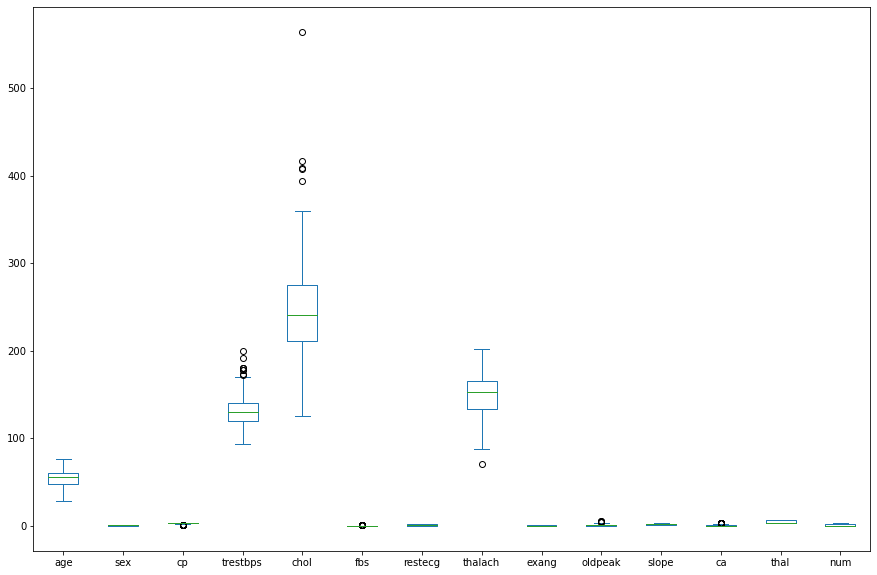

In [20]:
data.plot(kind="box", figsize=(15,10))

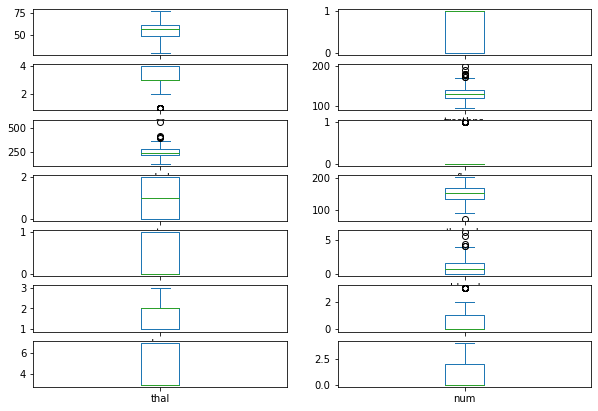

In [21]:
data.plot(kind="box", subplots=True, layout=(10,2), figsize=(10,10));

<AxesSubplot:>

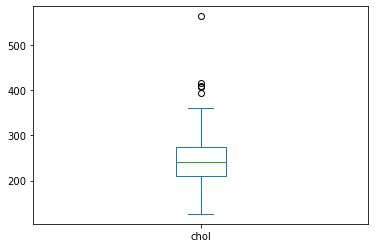

In [22]:
data.chol.plot(kind="box")

In [23]:
Q1=data.chol.quantile(0.25)
Q1

211.0

In [24]:
Q3=data.chol.quantile(0.75)
Q3

275.0

In [25]:
IQR=Q3-Q1
IQR

64.0

In [26]:
outliers_max=Q3+1.5*IQR
outliers_max

371.0

In [27]:
outliers_min=Q1-1.5*IQR
outliers_min

115.0

In [28]:
#tous les taux de cholesterol superieure à 371 ou inferieure à 115 peuvent consideré comme des valeurs aberantes (anormales, atypiques, anomalies)

In [29]:
Q1=data.quantile(0.25)
Q1

age          48.0
sex           0.0
cp            3.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
num           0.0
Name: 0.25, dtype: float64

In [30]:
Q3=data.quantile(0.75)
Q3

age          61.0
sex           1.0
cp            4.0
trestbps    140.0
chol        275.0
fbs           0.0
restecg       2.0
thalach     166.0
exang         1.0
oldpeak       1.6
slope         2.0
ca            1.0
thal          7.0
num           2.0
Name: 0.75, dtype: float64

In [31]:
IQR=Q3-Q1
outliers_min=Q1-1.5*IQR
outliers_max=Q3+1.5*IQR


In [32]:
((data<outliers_min) | (data>outliers_max)).sum()

age          0
sex          0
cp          23
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          20
thal         0
num          0
dtype: int64

In [33]:
((data<outliers_min) | (data>outliers_max)).sum()/303*100

age          0.000000
sex          0.000000
cp           7.590759
trestbps     2.970297
chol         1.650165
fbs         14.851485
restecg      0.000000
thalach      0.330033
exang        0.000000
oldpeak      1.650165
slope        0.000000
ca           6.600660
thal         0.000000
num          0.000000
dtype: float64

In [34]:
#ca
#la colonne CA comporte des données manquantes et a 6% de valeurs aberantes donc on va imputer par lA MEDIANE 
med=data.ca.median()
data.ca=data.ca.fillna(med)


In [35]:
#imputer les donnees manquantes de thal

In [36]:
#thal
#la colonne thal comporte des données manquantes et a 0% de valeurs aberantes donc on va imputer par lA MOYENNE 
moy=data.thal.mean()
data.thal=data.thal.fillna(moy)


In [37]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Normalisation ou standardisation

In [38]:
data.mean()

age          54.438944
sex           0.679868
cp            3.158416
trestbps    131.689769
chol        246.693069
fbs           0.148515
restecg       0.990099
thalach     149.607261
exang         0.326733
oldpeak       1.039604
slope         1.600660
ca            0.663366
thal          4.734219
num           0.937294
dtype: float64

<AxesSubplot:>

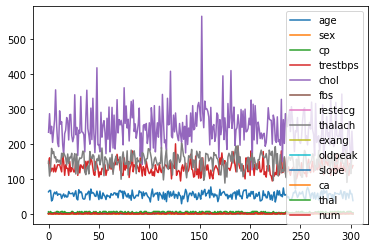

In [39]:
data.plot()

<AxesSubplot:>

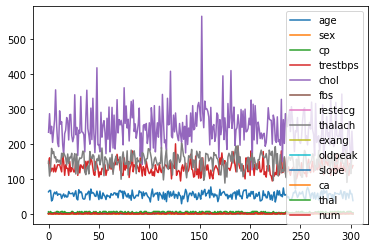

In [40]:
data.plot()

## Analyse

In [41]:
data.corr().num.sort_values()

thalach    -0.415040
fbs         0.059186
chol        0.070909
trestbps    0.157754
restecg     0.183696
age         0.222853
sex         0.224469
slope       0.377957
exang       0.397057
cp          0.407075
oldpeak     0.504092
thal        0.508799
ca          0.520968
num         1.000000
Name: num, dtype: float64

## Separer le dataset en donnees explicatives et à expliquer

In [42]:
#Les donnees explicatives ou features

In [43]:
X=data.drop(columns=["num"])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [44]:
#la variable à predire ou label

In [45]:
y=data.num
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

## Normalisation de X

<AxesSubplot:>

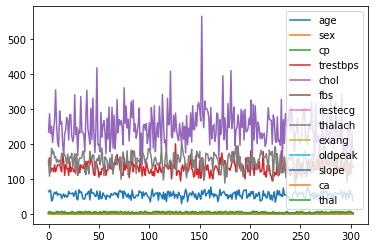

In [46]:
X.plot()

In [47]:
y=data.num

X=(X-X.mean())/X.std()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.947160,0.685069,-2.248056,0.756274,-0.264463,2.390484,1.015005,0.017169,-0.69548,1.085542,2.270822,-0.709957,0.654735
1,1.389703,0.685069,0.876535,1.608559,0.759159,-0.416945,1.015005,-1.818896,1.43311,0.396526,0.648041,2.500744,-0.897038
2,1.389703,0.685069,0.876535,-0.664201,-0.341717,-0.416945,1.015005,-0.900864,1.43311,1.343924,0.648041,1.430510,1.171993
3,-1.929372,0.685069,-0.164995,-0.096011,0.063869,-0.416945,-0.995103,1.634655,-0.69548,2.119067,2.270822,-0.709957,-0.897038
4,-1.486829,-1.454889,-1.206525,-0.096011,-0.824558,-0.416945,1.015005,0.978917,-0.69548,0.310399,-0.974740,-0.709957,-0.897038


<AxesSubplot:>

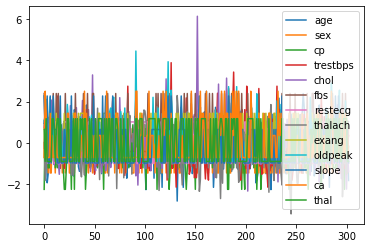

In [48]:
X.plot()

## Separer le dataset en train et en test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1) #on entraine le modele avec 90% des donnees et les 10% restantes seront utilisées pour le test

In [51]:
X_train.shape

(272, 13)

In [52]:
X_test.shape

(31, 13)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) #on entraine le modele


KNeighborsClassifier()

In [54]:
neigh.score(X_train, y_train) #on evalue le modele en entrainement (63%)

0.7095588235294118

In [55]:
neigh.score(X_test, y_test) #on evalue le modele en entrainement (61%)

0.6129032258064516

## Ameliorons le modele

In [56]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) #on entraine le modele
    print(k, neigh.score(X_train, y_train)) #on entraine le modele

1 1.0
2 0.7463235294117647
3 0.6985294117647058
4 0.7205882352941176
5 0.7095588235294118
6 0.6727941176470589
7 0.6764705882352942
8 0.6544117647058824
9 0.6470588235294118
10 0.6433823529411765


In [57]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.947160,0.685069,-2.248056,0.756274,-0.264463,2.390484,1.015005,0.017169,-0.69548,1.085542,2.270822,-0.709957,0.654735
1,1.389703,0.685069,0.876535,1.608559,0.759159,-0.416945,1.015005,-1.818896,1.43311,0.396526,0.648041,2.500744,-0.897038
2,1.389703,0.685069,0.876535,-0.664201,-0.341717,-0.416945,1.015005,-0.900864,1.43311,1.343924,0.648041,1.430510,1.171993
3,-1.929372,0.685069,-0.164995,-0.096011,0.063869,-0.416945,-0.995103,1.634655,-0.69548,2.119067,2.270822,-0.709957,-0.897038
4,-1.486829,-1.454889,-1.206525,-0.096011,-0.824558,-0.416945,1.015005,0.978917,-0.69548,0.310399,-0.974740,-0.709957,-0.897038


<AxesSubplot:ylabel='sex'>

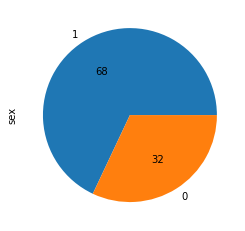

In [58]:
data.sex.value_counts(normalize=True).plot(kind="pie",autopct='%.0f')

<AxesSubplot:ylabel='num'>

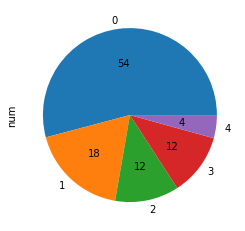

In [59]:
y.value_counts(normalize=True).plot(kind="pie",autopct='%.0f')

In [60]:
#ici les donnees y sont desequilibrées donc il faudra juste faire un modele pour predire si on est malade ou saine.

In [61]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [62]:
y=y.apply(lambda x: 1 if x>=1 else 0)

<AxesSubplot:ylabel='num'>

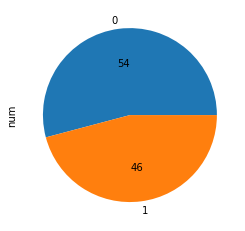

In [63]:
y.value_counts(normalize=True).plot(kind="pie",autopct='%.0f')

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1) #on entraine le modele avec 90% des donnees et les 10% restantes seront utilisées pour le test

In [65]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) #on entraine le modele
print(neigh.score(X_train, y_train))
print(neigh.score(X_test, y_test))

0.8933823529411765
0.8387096774193549


In [79]:

svm = sklearn.svm.SVC() 
svm.fit(X_train, y_train) #on entraine le modele
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9117647058823529
0.8709677419354839


In [67]:
#Je continue le cours avec ce modele svm qui est precis à plus de 75%

## Prediction

In [68]:
y_pred=svm.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [69]:
resultats=pandas.DataFrame()
resultats

""


In [70]:
resultats["reality"]=y_test
resultats["prediction"]=y_pred
resultats

,reality,prediction
248,1,1
151,0,0
147,0,0
107,1,1
108,1,1
261,1,0
35,0,0
299,1,1
1,1,1
177,1,1


In [71]:
pandas.crosstab(resultats["reality"],resultats["prediction"])

prediction,0,1
reality,,
0,13,0
1,4,14


In [72]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 4, 14]], dtype=int64)

In [73]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.78      0.88        18

    accuracy                           0.87        31
   macro avg       0.88      0.89      0.87        31
weighted avg       0.90      0.87      0.87        31



In [74]:
#dans le domaine medical, il faudra minimiser les faux negatifs!!!!

## Audit du modèle avec la variable sex

In [ ]:
#https://kobia.fr/imbalanced-data-smote/    technique d equilibrage de donnees
#http://aequitas.dssg.io/   audit de modele

In [ ]:
X_test

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

clf=sklearn.svm.SVC()
clf.fit(X_train, y_train) #on entraine le modele

# Split the test data based on the 'sex' column
X_test_men = X_test[X_test['sex'] >0]
y_test_men = y_test[X_test_men.index]

X_test_women = X_test[X_test['sex'] <0]
y_test_women = y_test[X_test_women.index]

# Predict using the trained model for men and women separately
y_pred_men = clf.predict(X_test_men)
y_pred_women = clf.predict(X_test_women)

# Calculate accuracy for men and women
accuracy_men = accuracy_score(y_test_men, y_pred_men)
accuracy_women = accuracy_score(y_test_women, y_pred_women)

print("precision man, women", accuracy_men,accuracy_women)


In [ ]:
#le modele est biasé et est en faveur pour les femmes

In [ ]:
data.num=data.num.apply(lambda x: 1 if x>=1 else 0)
pandas.crosstab(data["sex"],data["num"])

In [ ]:
72/97

In [ ]:
114/(114+92)

## Encodage des variables non numeriques

In [81]:
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          4
num           5
dtype: int64

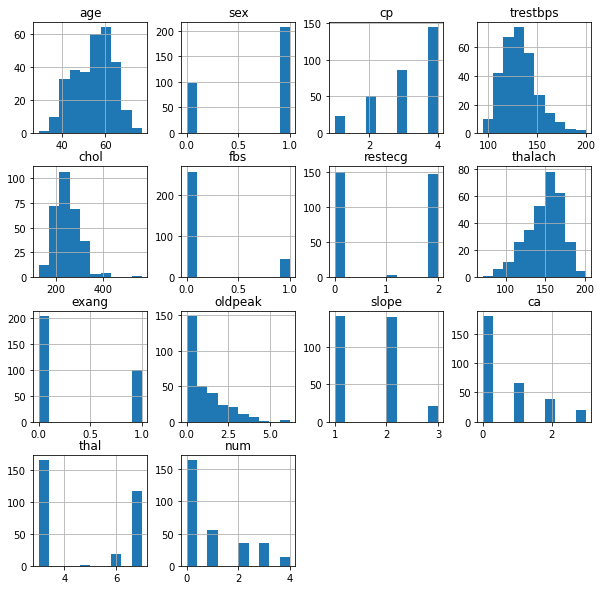

In [84]:
data.hist(figsize=(10,10));

In [85]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.30,3,0.00,6.00,0
1,67,1,4,160,286,0,2,108,1,1.50,2,3.00,3.00,2
2,67,1,4,120,229,0,2,129,1,2.60,2,2.00,7.00,1
3,37,1,3,130,250,0,0,187,0,3.50,3,0.00,3.00,0
4,41,0,2,130,204,0,2,172,0,1.40,1,0.00,3.00,0


In [87]:
#on encode la variable car elle est qualitative NOMINALE(y'a pas d'odre) 
data=pandas.get_dummies(data,columns=["sex"])
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex_0,sex_1
0,63,1,145,233,1,2,150,0,2.30,3,0.00,6.00,0,0,1
1,67,4,160,286,0,2,108,1,1.50,2,3.00,3.00,2,0,1
2,67,4,120,229,0,2,129,1,2.60,2,2.00,7.00,1,0,1
3,37,3,130,250,0,0,187,0,3.50,3,0.00,3.00,0,0,1
4,41,2,130,204,0,2,172,0,1.40,1,0.00,3.00,0,1,0


In [89]:
X=data.drop(columns=["num"])
y=data.num
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_0,sex_1
0,63,1,145,233,1,2,150,0,2.30,3,0.00,6.00,0,1
1,67,4,160,286,0,2,108,1,1.50,2,3.00,3.00,0,1
2,67,4,120,229,0,2,129,1,2.60,2,2.00,7.00,0,1
3,37,3,130,250,0,0,187,0,3.50,3,0.00,3.00,0,1
4,41,2,130,204,0,2,172,0,1.40,1,0.00,3.00,1,0


In [90]:
X=(X-X.mean())/X.std()
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_0,sex_1
0,0.95,-2.25,0.76,-0.26,2.39,1.02,0.02,-0.70,1.09,2.27,-0.71,0.65,-0.69,0.69
1,1.39,0.88,1.61,0.76,-0.42,1.02,-1.82,1.43,0.40,0.65,2.50,-0.90,-0.69,0.69
2,1.39,0.88,-0.66,-0.34,-0.42,1.02,-0.90,1.43,1.34,0.65,1.43,1.17,-0.69,0.69
3,-1.93,-0.16,-0.10,0.06,-0.42,-1.00,1.63,-0.70,2.12,2.27,-0.71,-0.90,-0.69,0.69
4,-1.49,-1.21,-0.10,-0.82,-0.42,1.02,0.98,-0.70,0.31,-0.97,-0.71,-0.90,1.45,-1.45


In [91]:
y=y.apply(lambda x: 1 if x>=1 else 0)
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1) 


In [93]:
svm = sklearn.svm.SVC() 
svm.fit(X_train, y_train) #on entraine le modele
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9154411764705882
0.7419354838709677


## Lazy code

In [ ]:
#https://pypi.org/project/lazypredict/

In [76]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.93it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.90               0.92     0.92      0.90   
SGDClassifier                      0.90               0.92     0.92      0.90   
LinearDiscriminantAnalysis         0.87               0.89     0.89      0.87   
SVC                                0.87               0.89     0.89      0.87   
RidgeClassifierCV                  0.87               0.89     0.89      0.87   
RidgeClassifier                    0.87               0.89     0.89      0.87   
NuSVC                              0.87               0.89     0.89      0.87   
NearestCentroid                    0.87               0.89     0.89      0.87   
LogisticRegression                 0.87               0.89     0.89      0.87   
LinearSVC                          0.87               0.89     0.89      0.87   
ExtraTreesClassifier        

In [134]:
data2=pandas.read_csv(r"C:\Users\sambe\Desktop\AIVANCITY\BACHELOR2\R ANALYSE/Labs-2PBS.csv", sep=";")

In [135]:
data2.MinutesTV=data2.MinutesTV.str.replace(',',".").astype("float64")
data2

,Sexe,Age,Statut,Occupation,Qualification,Etudie,NombreFS,NombreE,Jardinage,Cuisine,Sport,MinutesTV,LectureBD,MinutesL,EcouteRP,JournalIntime,Taille
0,F,60,Marie,Autre inactif,Cadre,Non,3,1,Non,Non,Oui,120.00,Non,0,Non,Non,Comme il faut
1,H,50,Marie,Exerce profession,Non concerne,Non,3,3,Oui,Non,Oui,257.14,Non,0,Non,Non,Comme il faut
2,F,33,Marie,Exerce profession,Cadre,Non,0,1,Non,Non,Non,51.43,Non,60,Non,Oui,Pas assez
3,H,82,Marie,Retraite,Non concerne,Non,1,2,Non,Non,Oui,60.00,Non,0,Non,Oui,Comme il faut
4,H,58,Marie,Exerce profession,Employe de bureau,Non,0,3,Non,Non,Non,180.00,Non,0,Non,Non,Comme il faut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8398,F,66,Veuf,Retraite,Ouvrier specialise,Non,2,2,Non,Oui,Non,360.00,Non,0,Non,Non,Pas assez
8399,F,54,Marie,Autre inactif,Ouvrier specialise,Non,4,5,Oui,Oui,Non,360.00,Non,180,Non,Non,Pas assez
8400,H,42,Marie,Exerce profession,Non concerne,Non,2,1,Oui,Non,Oui,60.00,Non,0,Non,Non,Comme il faut
8401,F,59,Marie,Autre inactif,Employe de bureau,Non,7,3,Oui,Non,Non,180.00,Non,0,Non,Non,Comme il faut


In [136]:
data2.describe()

,Age,NombreFS,NombreE,MinutesTV
count,8403.00,8403.00,8403.00,8403.00
mean,48.20,3.29,1.94,139.33
std,16.94,2.73,1.65,114.78
min,17.00,0.00,0.00,0.00
25%,35.00,1.00,1.00,60.00
50%,48.00,3.00,2.00,120.00
75%,60.00,5.00,3.00,180.00
max,97.00,23.00,12.00,1440.00


<AxesSubplot:xlabel='Statut', ylabel='NombreE'>

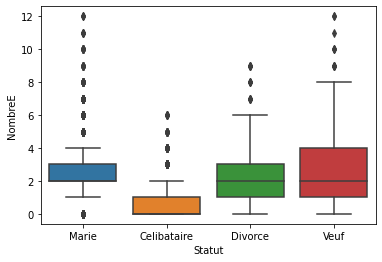

In [139]:
seaborn.boxplot(data=data2,y="NombreE", x="Statut")

<AxesSubplot:xlabel='Age', ylabel='NombreE'>

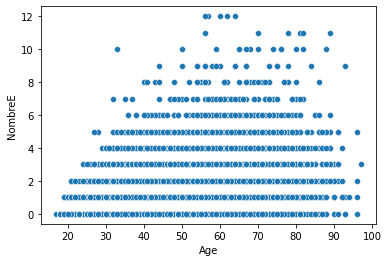

In [141]:
seaborn.scatterplot(data=data2,y="NombreE", x="Age")

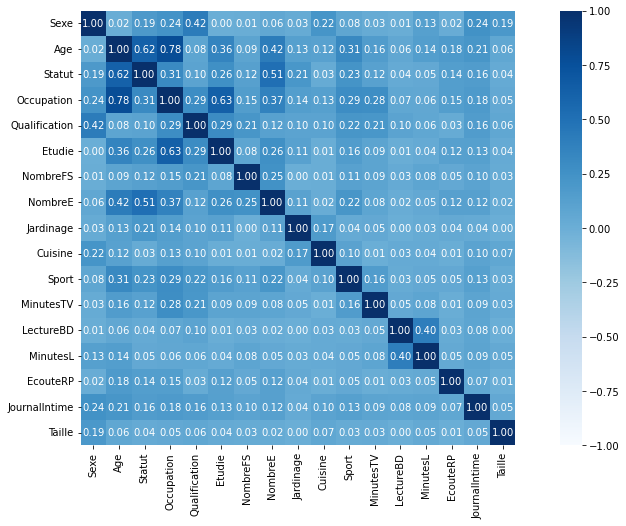

In [132]:
# using dython library
from dython.nominal import associations
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))
r = associations(data2, ax = ax, cmap = "Blues")

In [121]:
data2.MinutesTV.mean()

139.3295906223963

data2.head()

In [103]:
d=data2[["Sexe","Age","Statut"]]
d.head(2)

,Sexe,Age,Statut
0,F,60,Marie
1,H,50,Marie


In [104]:
d2=pandas.get_dummies(d, columns=["Sexe","Statut"])
d2.head(2)

,Age,Sexe_F,Sexe_H,Statut_Celibataire,Statut_Divorce,Statut_Marie,Statut_Veuf
0,60,1,0,0,0,1,0
1,50,0,1,0,0,1,0


In [106]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8403 entries, 0 to 8402
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 8403 non-null   int64
 1   Sexe_F              8403 non-null   uint8
 2   Sexe_H              8403 non-null   uint8
 3   Statut_Celibataire  8403 non-null   uint8
 4   Statut_Divorce      8403 non-null   uint8
 5   Statut_Marie        8403 non-null   uint8
 6   Statut_Veuf         8403 non-null   uint8
dtypes: int64(1), uint8(6)
memory usage: 115.0 KB


In [143]:
data2.duplicated().sum()

21

In [ ]:
import os

# Chemin du dossier contenant les fichiers JSON
dossier = 'chemin_du_dossier'

#Liste des fichiers JSON dans le dossier
fichiers = [f for f in os.listdir(dossier) if f.endswith('.json')]

dfs = []

for fichier in fichiers:
    chemin_complet = os.path.join(dossier, fichier)
    df = pd.read_json(chemin_complet)
    dfs.append(df)